In [2]:
import click
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
from MCEq.core import MCEqRun
import mceq_config as config
import crflux.models as pm
from MCEq.data import InteractionCrossSections
import sys
import os
import pickle

from cs_modifier_bsplines import ModIntCrossSections

In [10]:
interactionmodel='SIBYLL23C'

mceq_tune = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_air = MCEqRun(
    interaction_model="SIBYLL23C",
    theta_deg=0.0,
    primary_model=(pm.GlobalSplineFitBeta, None),
    density_model = ('MSIS00_IC',('South Pole','January')),
)

mceq_air.set_interaction_model("SIBYLL23C", force=True)
mceq_air.set_theta_deg(0)

cos_thetas = np.linspace(0.5, 1.0, num=6)
thetas = np.degrees(np.arccos(cos_thetas))

# modify cross section
modcs = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.05, b=0., c=0.) 

mceq_tune._int_cs = modcs # add modification to cross section in mceq instance
mceq_tune.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

#test if tuning is correct:
print('ratio pion cross section tuned/untuned: ', modcs.get_cs(211, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True))
#print('ratio kaon cross section tuned/untuned: ', modcs.get_cs(321, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(321, mbarn=True))
#print('ratio kaon cross section tuned/untuned: ', modcs.get_cs(2212, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(2212, mbarn=True))


# calcualte tuned flux for different seasons

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('South Pole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): GlobalSplineFitBeta 
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
ratio pion cross section tuned/untuned:  [       nan        nan        nan        n

/tmp/ipykernel_494620/2863725884.py:30: RuntimeWarning: invalid value encountered in divide
  print('ratio pion cross section tuned/untuned: ', modcs.get_cs(211, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db, interaction_model=interactionmodel).get_cs(211, mbarn=True))


/tmp/ipykernel_494620/640742313.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(mceq_air.e_grid,modcs.get_cs(211, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db,interaction_model=interactionmodel).get_cs(211, mbarn=True))


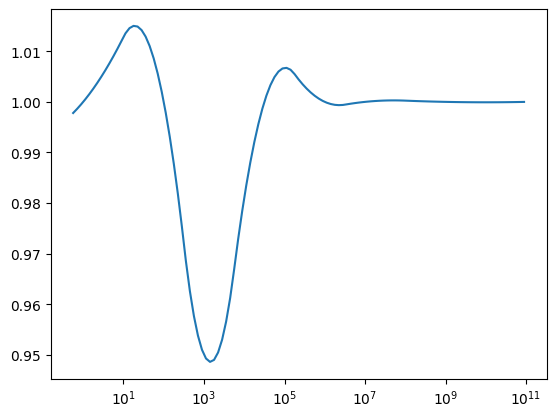

In [11]:
plt.plot(mceq_air.e_grid,modcs.get_cs(211, mbarn=True)/InteractionCrossSections(mceq_air._mceq_db,interaction_model=interactionmodel).get_cs(211, mbarn=True))
plt.xscale('log')
         

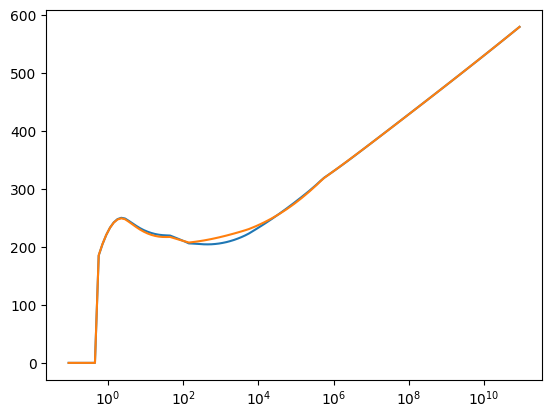

In [12]:
plt.plot(mceq_air.e_grid,modcs.get_cs(211, mbarn=True))
plt.plot(mceq_air.e_grid,InteractionCrossSections(mceq_air._mceq_db,interaction_model=interactionmodel).get_cs(211, mbarn=True))
plt.xscale('log')
         

In [23]:
modcs_all = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=00.05, b=0.05, c=0.0) 


mceq_tune = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_tune._int_cs = modcs_all # add modification to cross section in mceq instance
mceq_tune.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_a = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=00.05, b=0.0, c=0.0) 

mceq_a = MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_a._int_cs = modcs_a# add modification to cross section in mceq instance
mceq_a.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change

modcs_b = ModIntCrossSections(mceq_air._mceq_db, interaction_model="SIBYLL2.3c",ptype=211, a=-0.0, b=0.05, c=0.0) 

mceq_b= MCEqRun(
            interaction_model=interactionmodel,
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
            density_model = (('MSIS00_IC',('SouthPole','January')))
        )

mceq_b._int_cs = modcs_b# add modification to cross section in mceq instance
mceq_b.set_interaction_model(interactionmodel, force=True) # necessary to force cross section change





MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_trackin

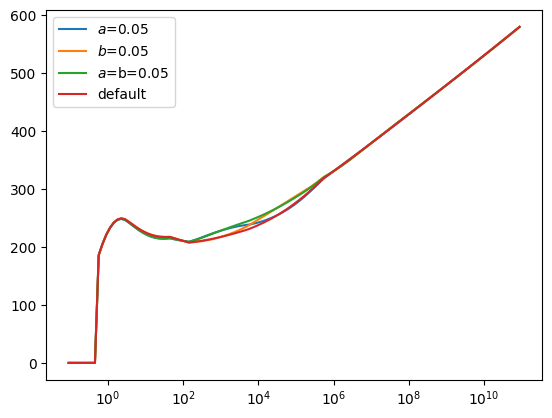

In [24]:
plt.plot(mceq_a.e_grid,modcs_a.get_cs(211, mbarn=True),label='$a$=0.05')
plt.plot(mceq_a.e_grid,modcs_b.get_cs(211, mbarn=True),label='$b$=0.05')
#plt.plot(mceq_a.e_grid,modcs_a.get_cs(211, mbarn=True)+modcs_b.get_cs(211, mbarn=True))
plt.plot(mceq_a.e_grid,modcs_all.get_cs(211, mbarn=True),label='$a$=b=0.05')
plt.plot(mceq_air.e_grid,InteractionCrossSections(mceq_air._mceq_db,interaction_model=interactionmodel).get_cs(211, mbarn=True),label='default')
plt.legend()



plt.xscale('log')